# Importing Libraries

In [971]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [972]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

plt.rcParams['figure.figsize'] = (12,8)

# Importing Dataset

In [973]:
df = pd.read_csv('HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [974]:
df.shape

(2073, 81)

In [975]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

# Removing Duplicate values

In [976]:
df.duplicated().sum()

13

In [977]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [978]:
df.duplicated().sum()

0

# Missing Value Treatment

- Mostly values are filled '0' or 'none' as values are missing only if that feature is not available

In [979]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
missing_values['Values'] = (df.isna().sum().sort_values(ascending=False)*100/df.shape[0]).values

missing_values

,0,Values
PoolQC,2052,99.611650
MiscFeature,1981,96.165049
Alley,1932,93.786408
Fence,1659,80.533981
FireplaceQu,977,47.427184
LotFrontage,317,15.388350
GarageCond,113,5.485437
GarageType,113,5.485437
GarageYrBlt,113,5.485437
GarageFinish,113,5.485437


In [980]:
## Dropping PoolQC

df.drop(columns=['PoolQC'], inplace=True)

## MiscFeature

In [981]:
df['MiscFeature'].fillna('None', inplace=True)

## Alley

In [982]:
df['Alley'].fillna('None', inplace=True)

## Fence

In [983]:
df['Fence'].fillna('None', inplace=True)

## FireplaceQu

In [984]:
df['FireplaceQu'].fillna('None', inplace=True)

## LotFrontage

In [985]:
df[df['LotFrontage'] < 40]['LotFrontage'].value_counts()

21.0    29
24.0    23
34.0    16
35.0    14
36.0     9
30.0     8
32.0     8
39.0     5
37.0     5
38.0     3
33.0     2
Name: LotFrontage, dtype: int64

In [986]:
## Linear feet of street-connected to the property

df['LotFrontage'].fillna(0, inplace=True)

## GarageCond

In [987]:
df['GarageCond'].value_counts()

TA    1872
Fa      47
Gd      17
Po       8
Ex       3
Name: GarageCond, dtype: int64

In [988]:
df['GarageCond'].isna().sum()

113

In [989]:
# GarageCond is filled 'None' as Garage isn't available

df['GarageCond'].fillna('None', inplace=True)

## GarageType

In [990]:
df['GarageType'].value_counts()

Attchd     1244
Detchd      533
BuiltIn     124
Basment      27
CarPort      12
2Types        7
Name: GarageType, dtype: int64

In [991]:
# GarageType is filled 'None' as Garage itself isn't available

df['GarageType'].fillna('None', inplace=True)

## GarageYrBlt

In [992]:
df['GarageYrBlt'].isna().sum()

113

In [993]:
# filling NA values in GarageYrBlt assuming 1 year after House was built

for i in df[df['GarageYrBlt'].isna()].index:
    df['GarageYrBlt'][i] = df['YearBuilt'][i] + 1

## GarageFinish

In [994]:
df['GarageFinish'].value_counts()

Unf    851
RFn    600
Fin    496
Name: GarageFinish, dtype: int64

In [995]:
df['GarageFinish'].fillna('None', inplace=True)

## GarageQual

In [996]:
df['GarageQual'].value_counts()

TA    1857
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64

In [997]:
df['GarageQual'].fillna('None', inplace=True)

## BsmtExposure

In [998]:
df['BsmtExposure'].value_counts()

No    1340
Av     319
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64

In [999]:
df['BsmtExposure'].fillna('No', inplace=True)

## BsmtFinType2

In [1000]:
df['BsmtFinType2'].value_counts()

Unf    1759
Rec      79
LwQ      67
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64

In [1001]:
df['BsmtFinType2'].fillna('None', inplace=True)

## BsmtFinType1

In [1002]:
df['BsmtFinType1'].value_counts()

Unf    601
GLQ    596
ALQ    317
BLQ    209
Rec    170
LwQ    109
Name: BsmtFinType1, dtype: int64

In [1003]:
df['BsmtFinType1'].fillna('None', inplace=True)

## BsmtCond

In [1004]:
df['BsmtCond'].value_counts()

TA    1841
Gd      98
Fa      61
Po       2
Name: BsmtCond, dtype: int64

In [1005]:
df['BsmtCond'].fillna('None', inplace=True)

## BsmtQual

In [1006]:
df['BsmtQual'].value_counts()

Gd    898
TA    885
Ex    169
Fa     50
Name: BsmtQual, dtype: int64

In [1007]:
df['BsmtQual'].fillna('None', inplace=True)

## MasVnrType

In [1008]:
df['MasVnrType'].value_counts()

None       1225
BrkFace     618
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

In [1009]:
df['MasVnrType'].fillna('None', inplace=True)

## MasVnrArea

In [1010]:
df['MasVnrArea'].fillna(0, inplace=True)

## Electrical

In [1011]:
df['Electrical'].value_counts()

SBrkr    1891
FuseA     124
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1012]:
df['Electrical'].fillna('SBrkr', inplace=True)

# Data Preprocessing

In [1013]:
df['Dwell_Type'].value_counts()

20      717
60      428
50      205
30      132
120     114
90       88
80       78
160      77
70       77
190      42
85       34
75       19
180      14
150      13
45       13
40        7
303       1
7080      1
Name: Dwell_Type, dtype: int64

In [1014]:
df['Dwell_Type'] = df['Dwell_Type'].astype('object')

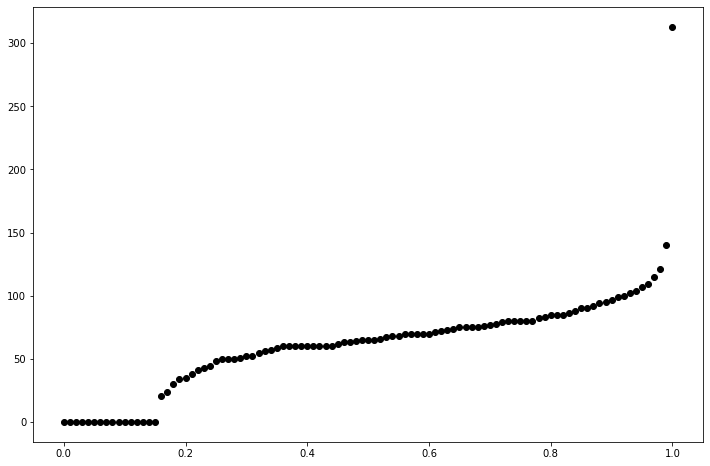

In [1015]:
plt.plot(df['LotFrontage'].quantile(np.arange(0,1.01,0.01)), 'o', color='black')

In [1016]:
df['LotFrontage'] = df['LotFrontage'].apply(lambda x: 150 if x > 150 else x )

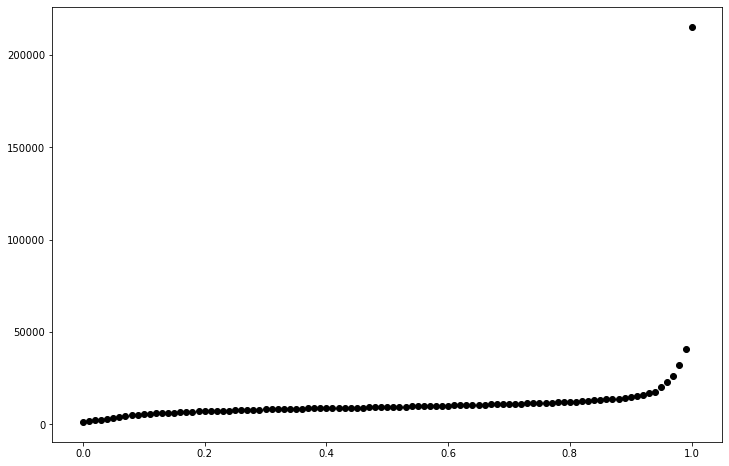

In [1017]:
plt.plot(df['LotArea'].quantile(np.arange(0,1.01,0.01)), 'o', color='black')

In [1018]:
df['LotArea'] = df['LotArea'].apply(lambda x: 45000 if x > 45000 else x)

In [1019]:
df['LotConfig'].value_counts()

Inside     1470
Corner      385
CulDSac     136
FR2          65
FR3           4
Name: LotConfig, dtype: int64

In [1020]:
df['LotConfig'] = df['LotConfig'].apply(lambda x: 'FR2+' if (x == 'FR2') | (x == 'FR3') else x)

In [1021]:
df['LandSlope'].value_counts()

Gtl    1946
Mod     100
Sev      14
Name: LandSlope, dtype: int64

In [1022]:
df['LandSlope'] = df['LandSlope'].apply(lambda x: 1 if x == 'Gtl' else 0).astype(str)

In [1023]:
df['OverallQual'].value_counts()

5     501
6     461
7     413
8     265
4     213
9     164
3      20
10     17
2       4
1       2
Name: OverallQual, dtype: int64

In [1024]:
df['OverallQual'] = df['OverallQual'].astype(object)

In [1025]:
df['OverallCond'].value_counts()

5    935
6    348
7    313
8    172
4    147
9    113
3     26
2      5
1      1
Name: OverallCond, dtype: int64

In [1026]:
df['OverallCond'] = df['OverallCond'].astype('object')

In [1027]:
df['YearRemodAdd'] = 2024 - df['YearRemodAdd']

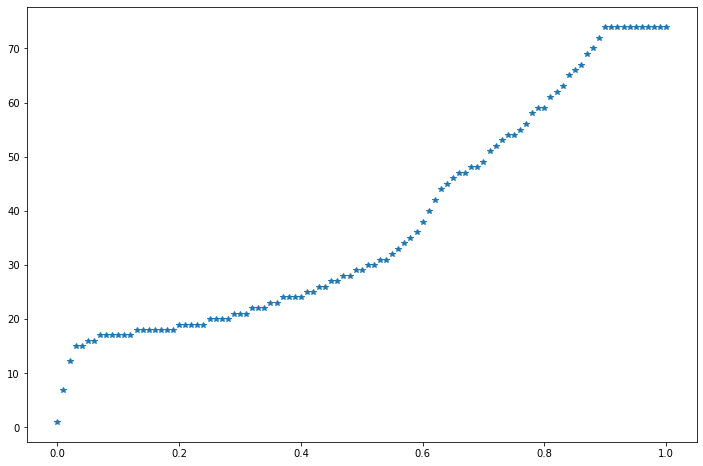

In [1028]:
plt.plot(df['YearRemodAdd'].quantile(np.arange(0,1.01,0.01)), '*')

In [1029]:
df['Exterior1st'].value_counts()

VinylSd    744
HdBoard    313
MetalSd    305
Wd Sdng    285
Plywood    155
CemntBd     87
BrkFace     72
WdShing     37
Stucco      28
AsbShng     24
Stone        3
BrkComm      3
AsphShn      2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [1030]:
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'other' if (x=='Stone')|(x=='BrkComm')|(x=='AsphShn')|(x=='CBlock')|
                                                                 (x=='ImStucc') else x)

In [1031]:
df['Exterior1st'].value_counts()

VinylSd    744
HdBoard    313
MetalSd    305
Wd Sdng    285
Plywood    155
CemntBd     87
BrkFace     72
WdShing     37
Stucco      28
AsbShng     24
other       10
Name: Exterior1st, dtype: int64

In [1032]:
df['Exterior2nd'].value_counts()

VinylSd    723
MetalSd    296
HdBoard    291
Wd Sdng    276
Plywood    203
CmentBd     85
Wd Shng     55
BrkFace     35
Stucco      29
AsbShng     27
ImStucc     14
Brk Cmn     11
Stone        9
AsphShn      4
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [1033]:
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'Other' if (x=='Stone')|(x=='BrkComm')|(x=='AsphShn')|(x=='CBlock')|
                                                                 (x=='ImStucc') else x)

In [1034]:
df['Exterior2nd'].value_counts()

VinylSd    723
MetalSd    296
HdBoard    291
Wd Sdng    276
Plywood    203
CmentBd     85
Wd Shng     55
BrkFace     35
Other       29
Stucco      29
AsbShng     27
Brk Cmn     11
Name: Exterior2nd, dtype: int64

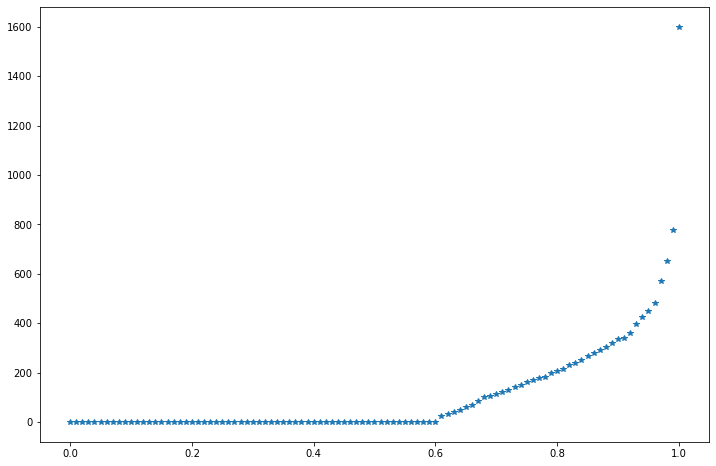

In [1035]:
plt.plot(df['MasVnrArea'].quantile(np.arange(0,1.01,0.01)), '*')

In [1036]:
df['MasVnrArea'] = df['MasVnrArea'].apply(lambda x: 850 if x>850 else x)

In [1037]:
df['Foundation'].value_counts()

PConc     923
CBlock    895
BrkTil    190
Slab       39
Stone      10
Wood        3
Name: Foundation, dtype: int64

In [1038]:
df['Foundation'] = df['Foundation'].apply(lambda x: 'Other' if (x=='Stone')|(x=='Wood') else x)

In [1039]:
df['BsmtCond'].value_counts()

TA      1841
Gd        98
Fa        61
None      58
Po         2
Name: BsmtCond, dtype: int64

In [1040]:
df['BsmtCond'] = df['BsmtCond'].apply(lambda x: 'None' if x=='Po' else x)

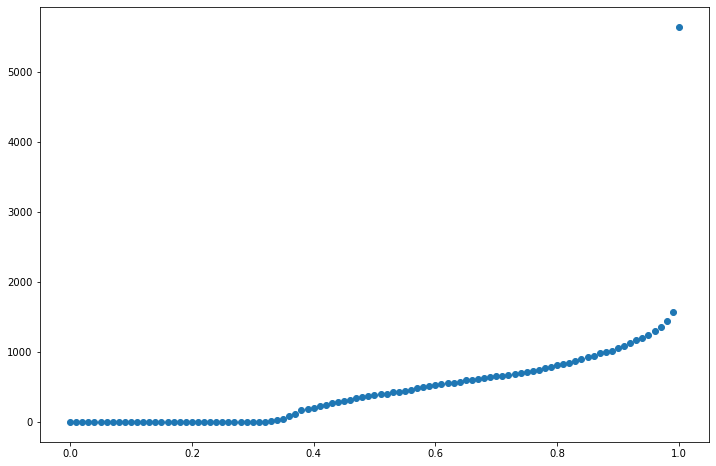

In [1041]:
plt.plot(df['BsmtFinSF1'].quantile(np.arange(0,1.01,0.01)), 'o')

In [1042]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].apply(lambda x: 1640 if x > 1640 else x)

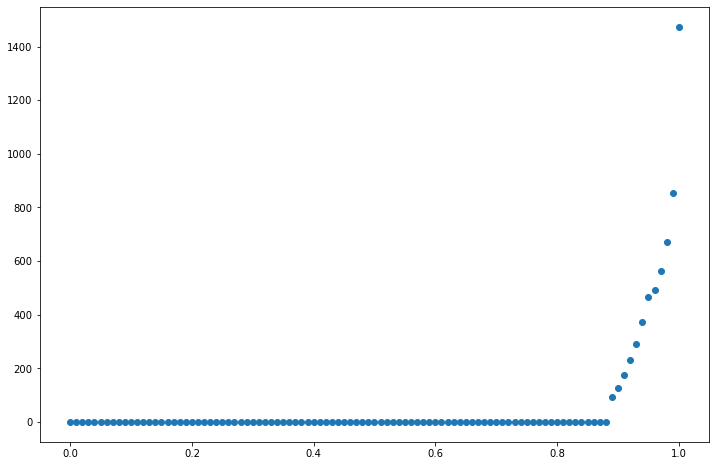

In [1043]:
plt.plot(df['BsmtFinSF2'].quantile(np.arange(0,1.01,0.01)), 'o')

In [1044]:
df['BsmtFinSF2'] = df['BsmtFinSF2'].apply(lambda x: 900 if x > 900 else x)

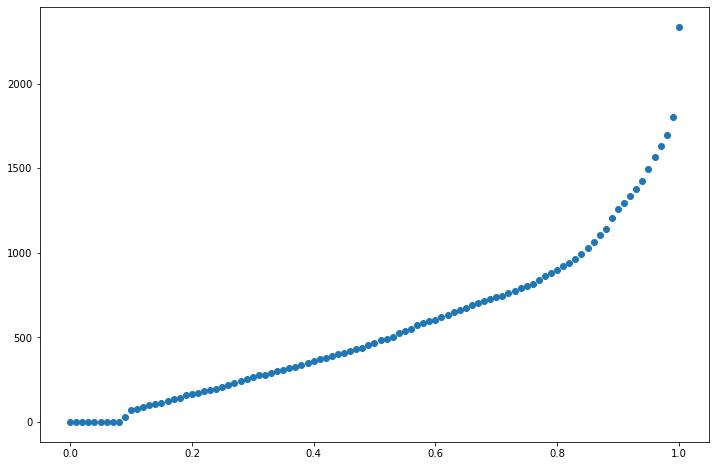

In [1045]:
plt.plot(df['BsmtUnfSF'].quantile(np.arange(0,1.01,0.01)), 'o')

In [1046]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].apply(lambda x: 1920 if x > 1920 else x)

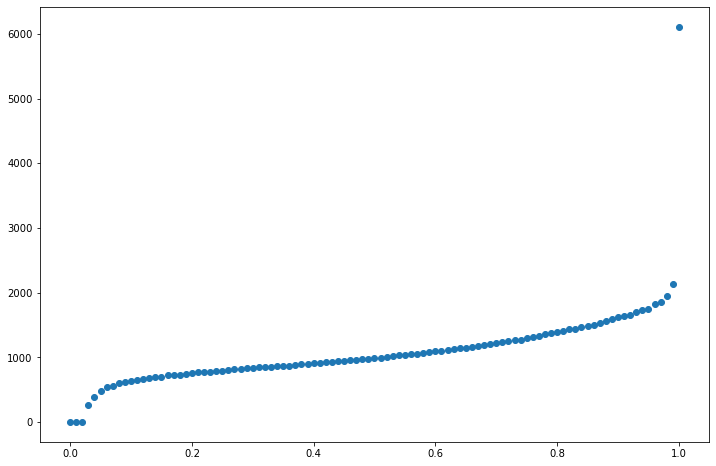

In [1047]:
plt.plot(df['TotalBsmtSF'].quantile(np.arange(0,1.01,0.01)), 'o')

In [1048]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].apply(lambda x: 2280 if x > 2280 else x)

In [1049]:
df['Heating'].value_counts()

GasA     2012
GasW       25
Grav       10
Wall        8
Floor       3
OthW        2
Name: Heating, dtype: int64

In [1050]:
df['Heating'] = df['Heating'].apply(lambda x: 'other' if (x=='Grav')|(x=='Wall')|(x=='Floor')|(x=='OthW') else x)

In [1051]:
df['HeatingQC'].value_counts()

Ex    1039
TA     611
Gd     341
Fa      68
Po       1
Name: HeatingQC, dtype: int64

In [1052]:
df['HeatingQC'] = df['HeatingQC'].apply(lambda x: 'Fa' if x=='Po' else x)

In [1053]:
df['CentralAir'].value_counts()

Y    1924
N     136
Name: CentralAir, dtype: int64

In [1054]:
df['CentralAir'] = df['CentralAir'].map({'Y':1,'N':0}).astype(str)

In [1055]:
df['Electrical'].value_counts()

SBrkr    1892
FuseA     124
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1056]:
df['Electrical'] = df['Electrical'].apply(lambda x: x if (x=='SBrkr')|(x=='FuseA') else 'Other')

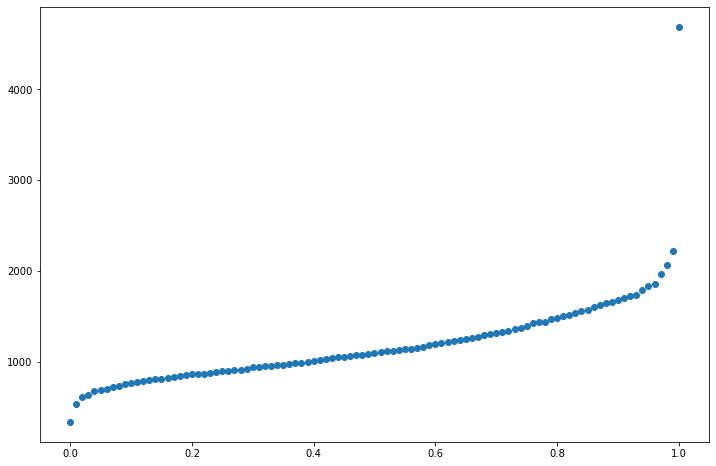

In [1057]:
plt.plot(df['1stFlrSF'].quantile(np.arange(0,1.01,0.01)),'o')

In [1058]:
df['1stFlrSF'] = df['1stFlrSF'].apply(lambda x: 2350 if x > 2350 else x)

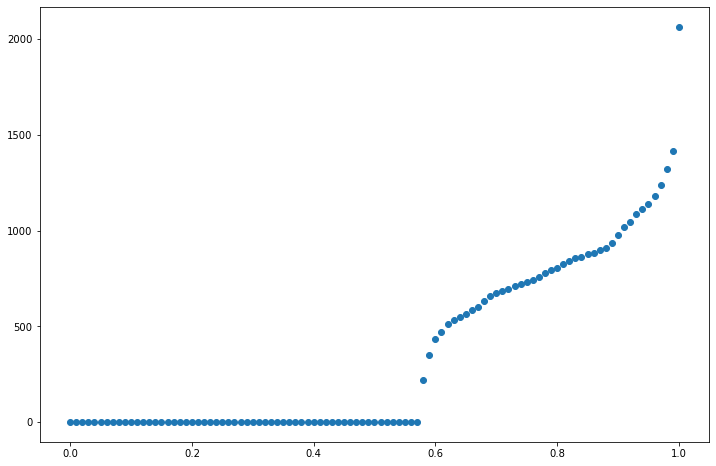

In [1059]:
plt.plot(df['2ndFlrSF'].quantile(np.arange(0,1.01,0.01)),'o')

In [1060]:
df['2ndFlrSF'] = df['2ndFlrSF'].apply(lambda x: 1510 if x > 1510 else x)

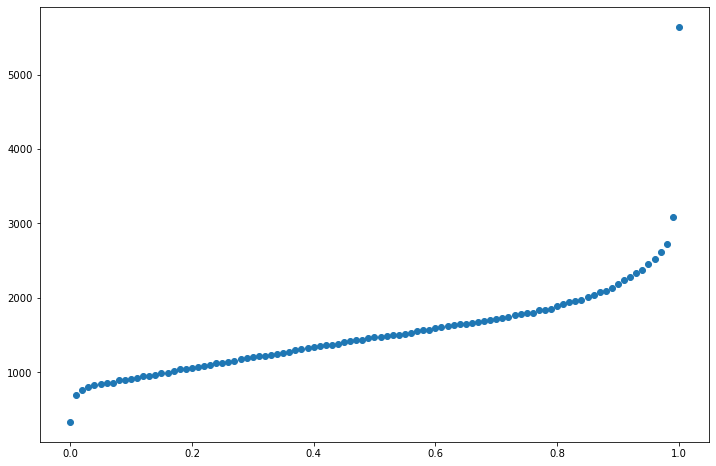

In [1061]:
plt.plot(df['GrLivArea'].quantile(np.arange(0,1.01,0.01)),'o')

In [1062]:
df['GrLivArea'] = df['GrLivArea'].apply(lambda x: 3400 if x>3400 else x)

In [1063]:
df['BsmtFullBath'].value_counts()

0    1199
1     836
2      23
3       2
Name: BsmtFullBath, dtype: int64

In [1064]:
df['BsmtFullBath'] = df['BsmtFullBath'].apply(lambda x: 2 if x == 3 else x).astype('object')

In [1065]:
df['BsmtHalfBath'].value_counts()

0    1946
1     111
2       3
Name: BsmtHalfBath, dtype: int64

In [1066]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].map({0:0, 1:1, 2:1}).astype(object)

In [1067]:
df['FullBath'].value_counts()

2    1109
1     896
3      41
0      14
Name: FullBath, dtype: int64

In [1068]:
df['FullBath'] = df['FullBath'].astype(object)

In [1069]:
df['HalfBath'].value_counts()

0    1295
1     750
2      15
Name: HalfBath, dtype: int64

In [1070]:
df['HalfBath'] = df['HalfBath'].astype(object)

In [1071]:
df['BedroomAbvGr'].value_counts()

3    1123
2     501
4     317
1      71
5      29
6       9
0       9
8       1
Name: BedroomAbvGr, dtype: int64

In [1072]:
df['BedroomAbvGr'] = df['BedroomAbvGr'].apply(lambda x: '4+' if x>3 else x)

In [1073]:
df['KitchenAbvGr'].value_counts()

1    1955
2      98
3       5
0       2
Name: KitchenAbvGr, dtype: int64

In [1074]:
df['KitchenAbvGr'] = df['KitchenAbvGr'].map({0:0,1:1,2:2,3:2}).astype(str)

In [1075]:
df['TotRmsAbvGrd'].value_counts()

6     574
7     458
5     395
8     265
4     126
9     106
10     65
11     30
3      22
12     17
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [1076]:
df['TotRmsAbvGrd'].apply(lambda x: '8+' if x>7 else x) .value_counts()

6     574
8+    484
7     458
5     395
4     126
3      22
2       1
Name: TotRmsAbvGrd, dtype: int64

In [1077]:
df['Functional'].value_counts()

Typ     1925
Min1      48
Min2      47
Mod       18
Maj1      15
Maj2       6
Sev        1
Name: Functional, dtype: int64

In [1078]:
df['Functional'] = df['Functional'].map({'Typ':'Typ','Min1':'Min','Min2':'Min','Mod':'Mod','Maj1':'Mod','Maj2':'Maj',
                                         'Sev':'Maj'})

In [1079]:
df['Fireplaces'].value_counts()

0    977
1    925
2    153
3      5
Name: Fireplaces, dtype: int64

In [1080]:
df['Fireplaces'] = df['Fireplaces'].astype(str)

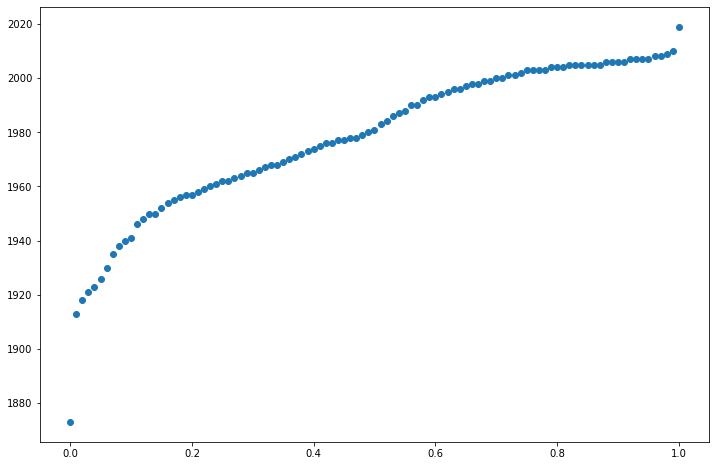

In [1081]:
plt.plot(df['GarageYrBlt'].quantile(np.arange(0,1.01,0.01)),'o')

In [1082]:
df['GarageYrBlt'] = 2024 - df['GarageYrBlt'].apply(lambda x: 1900 if x<1900 else x)

In [1083]:
df['GarageCars'].value_counts()

2    1178
1     505
3     258
0     113
4       6
Name: GarageCars, dtype: int64

In [1084]:
df['GarageCars'] = df['GarageCars'].apply(lambda x: '3+' if x>2 else x)

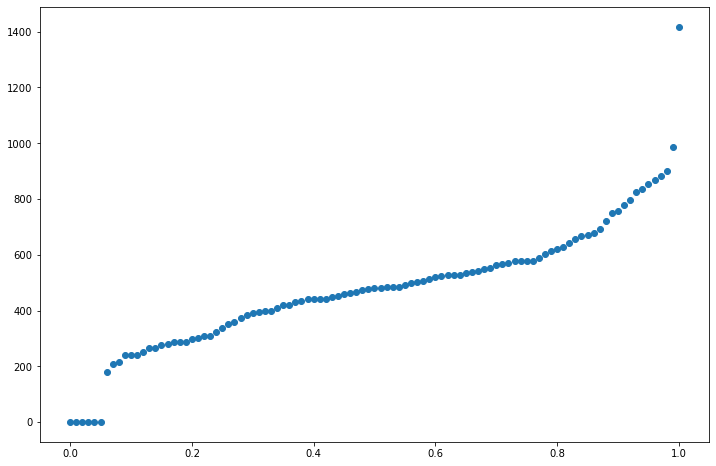

In [1085]:
plt.plot(df['GarageArea'].quantile(np.arange(0,1.01,0.01)),'o')

In [1086]:
df['GarageArea'] = df['GarageArea'].apply(lambda x: 1080 if x>1080 else x)

In [1087]:
df['GarageQual'].value_counts()

TA      1857
None     113
Fa        65
Gd        18
Ex         4
Po         3
Name: GarageQual, dtype: int64

In [1088]:
df['GarageQual'] = df['GarageQual'].apply(lambda x: 'None' if x=='Po' else 'Gd' if x=='Ex' else x)

In [1089]:
df['GarageCond'].value_counts()

TA      1872
None     113
Fa        47
Gd        17
Po         8
Ex         3
Name: GarageCond, dtype: int64

In [1090]:
df['GarageCond'] = df['GarageCond'].apply(lambda x: 'None' if x=='Po' else 'Gd' if x=='Ex' else x)

In [1091]:
df['PavedDrive'].value_counts()

Y    1900
N     116
P      44
Name: PavedDrive, dtype: int64

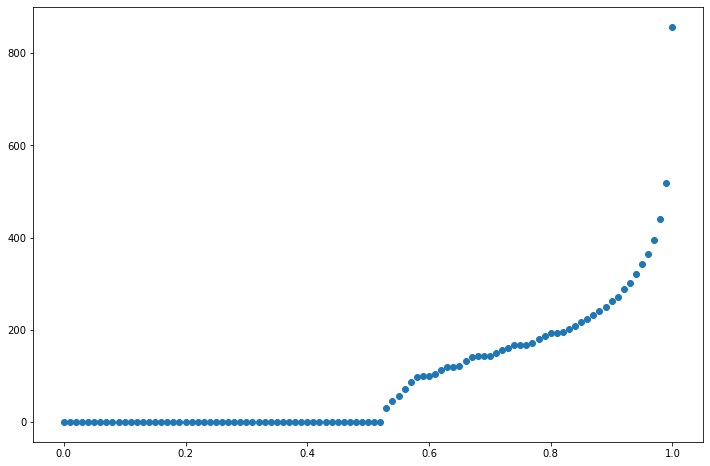

In [1092]:
plt.plot(df['WoodDeckSF'].quantile(np.arange(0,1.01,0.01)),'o')

In [1093]:
df['WoodDeckSF'] = df['WoodDeckSF'].apply(lambda x: 584 if x>584 else x)

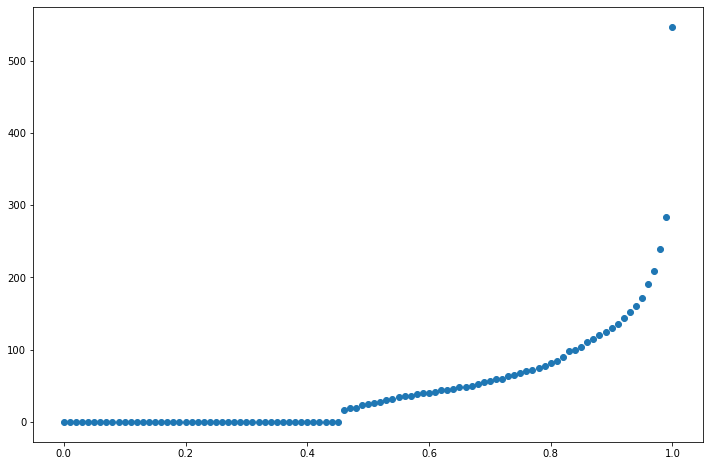

In [1094]:
plt.plot(df['OpenPorchSF'].quantile(np.arange(0,1.01,0.01)),'o')

In [1095]:
df['OpenPorchSF'] = df['OpenPorchSF'].apply(lambda x: 333 if x>333 else x)

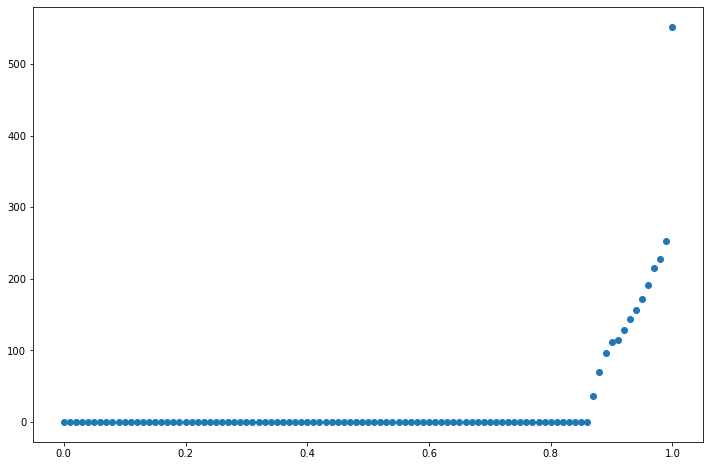

In [1096]:
plt.plot(df['EnclosedPorch'].quantile(np.arange(0,1.01,0.01)),'o')

In [1097]:
df['EnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 280 if x>280 else x)

In [1098]:
df['PoolArea'] = df['PoolArea'].apply(lambda x: 1 if x!=0 else 0)

- **'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'**

In [1099]:
df['MiscFeature'].value_counts()

None    1981
Shed      73
Othr       3
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [1100]:
df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 0 if x == 'None' else 1)

In [1101]:
df['Alley'].value_counts()

None    1932
Grvl      72
Pave      56
Name: Alley, dtype: int64

In [1102]:
df['Alley'] = df['Alley'].apply(lambda x: 0 if x == 'None' else 1)

In [1103]:
df['Alley'] = df['Alley'].astype(str)

In [1104]:
df['Fence'].value_counts()

None     1659
MnPrv     230
GdPrv      88
GdWo       69
MnWw       14
Name: Fence, dtype: int64

In [1105]:
df['Fence'] = df['Fence'].apply(lambda x: 'Yes' if x=='GdPrv' else 'No' if x=='None' else 'min')

In [1106]:
df['FireplaceQu'].value_counts()

None    977
Gd      528
TA      457
Fa       40
Ex       33
Po       25
Name: FireplaceQu, dtype: int64

In [1107]:
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: 'None' if x=='Po' else x)

In [1108]:
df['ScreenPorch'] = df['ScreenPorch'].apply(lambda x: 1 if x>0 else 0).astype(str)

In [1109]:
df['YrSold'] = 2024 - df['YrSold']

In [1110]:
df['SaleType'].value_counts()

WD       1787
New       168
COD        68
ConLD      14
ConLw       5
ConLI       5
Oth         5
CWD         5
Con         3
Name: SaleType, dtype: int64

In [1111]:
df['SaleType'] = df['SaleType'].apply(lambda x: 'WD' if x=='CWD' else 'Con' if (x=='ConLw')|(x=='ConLD')|(x=='ConLI') else x)

## Dropping unnecessary columns

- **'RoofMatl','LowQualFinSF','3SsnPorch','YearBuilt', 'Id', 'Utilities', 'Road_Type', 'MiscVal', 'MoSold'**

- Dropping these columns as they has very few '1' value in binary dtype or above 95% of values belong to same category which is often not perceived by the model correctly.

In [1112]:
df['Road_Type'].value_counts()

Pave    2050
Grvl      10
Name: Road_Type, dtype: int64

In [1113]:
df['RoofMatl'].value_counts()

CompShg    2023
Tar&Grv      17
WdShngl      10
WdShake       6
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [1114]:
df.drop(columns=['RoofMatl','LowQualFinSF','3SsnPorch','YearBuilt', 'Id', 'Utilities', 'Road_Type', 'MiscVal', 'MoSold'],
                inplace=True)

# Model Making

In [1115]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import math
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1116]:
df1 = df.copy()

In [1117]:
num_col = [i for i in df1.columns if df1[i].dtype != object]
num_col.remove('Property_Sale_Price')
print(num_col)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MiscFeature', 'YrSold']


- **Scaling numerical Features**`

In [1118]:
sc = StandardScaler()

In [1119]:
sc.fit_transform(df1['LotFrontage'].values.reshape(-1,1))

array([[ 0.14590102],
       [ 0.60161128],
       [ 0.23704308],
       ...,
       [ 2.72825917],
       [-0.24904787],
       [ 1.1484636 ]])

In [1120]:
for i in num_col:
    df1[i] = sc.fit_transform(df1[i].values.reshape(-1,1))

In [1121]:
df1[num_col].head(3)

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,YrSold
0,0.145901,-0.334048,-0.800849,0.565281,0.634314,-0.304764,-0.925241,-0.472962,-0.849089,1.170946,0.388372,0.898299,-0.953513,0.352153,-0.751476,0.244430,-0.358791,-0.062439,-0.199697,-0.111862
1,0.601611,-0.142685,0.522636,-0.587197,1.270039,-0.304764,-0.626371,0.521046,0.270145,-0.788123,-0.502730,-0.330858,0.103686,-0.067108,1.641080,-0.731457,-0.358791,-0.062439,-0.199697,0.641195
2,0.237043,0.131879,-0.751831,0.365361,0.120125,-0.304764,-0.291814,-0.316271,-0.672658,1.198474,0.539541,-0.330858,-0.875202,0.638013,-0.751476,-0.059535,-0.358791,-0.062439,-0.199697,-0.111862


- **Creating Dummy Dataframe**

In [1122]:
dummy_col = [i for i in df1.columns if (df1[i].dtype == object)&(df1[i].nunique()>2)]
print(dummy_col)

['Dwell_Type', 'Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [1123]:
df1 = pd.get_dummies(df1, columns=dummy_col, drop_first=True)

In [1124]:
df1.shape

(2060, 249)

## Linear Regression

### Num_col

In [1125]:
x = df1[num_col]
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1126]:
print('X Train : {}'.format(x_train.shape))
print('X Train : {}'.format(x_test.shape))

X Train : (1545, 20)
X Train : (515, 20)


In [1127]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [1128]:
# print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

RMSE : 36134.435111182225
MAE : 23243.61831943319


- SequentialFeatureSelector (Similar to step function in r)

In [1129]:
sfs1 = sfs(LinearRegression(), k_features=20, forward=True, floating=True, cv=5, verbose=1, scoring='r2')

sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
Features: 1/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBacken

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=20, scoring='r2', verbose=1)

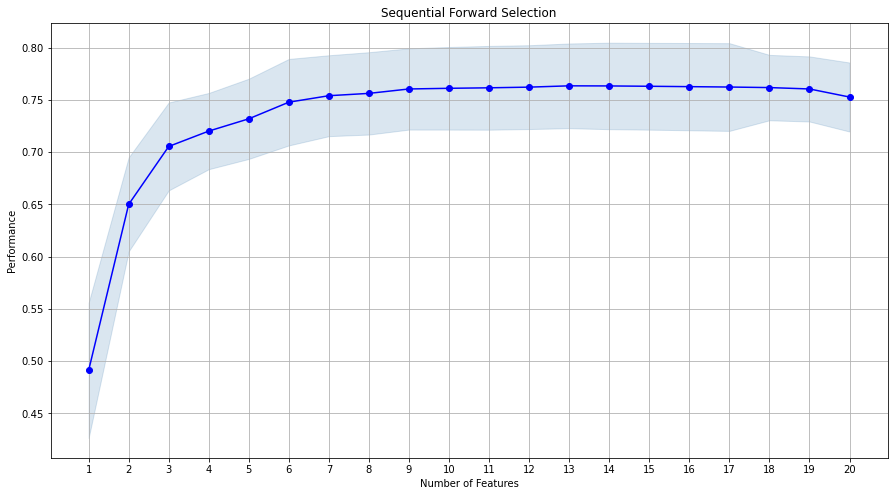

In [1130]:
plt.rcParams['figure.figsize'] = (15,8)

fig1 = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [1131]:
# Creating Dataframe representing performance of Features in SFS 

sfs1_df = pd.DataFrame(sfs1.get_metric_dict()).T.reset_index()

display(sfs1_df.head(3))

,index,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,1,"(10,)","[0.47255035699363745, 0.3751140046492668, 0.51...",0.491133,"(GrLivArea,)",0.0831352,0.064682,0.032341
1,2,"(7, 10)","[0.6431105258134693, 0.5702667449170122, 0.652...",0.650001,"(TotalBsmtSF, GrLivArea)",0.0578179,0.0449843,0.0224921
2,3,"(7, 10, 12)","[0.7113205294132794, 0.6339338876311481, 0.689...",0.705429,"(TotalBsmtSF, GrLivArea, GarageYrBlt)",0.0540531,0.0420551,0.0210276


In [1132]:
# Best score at 

sfs1_df.iloc[9].to_frame()

,9
index,10
feature_idx,"(1, 2, 3, 4, 7, 8, 9, 12, 13, 14)"
cv_scores,"[0.7246336762577608, 0.7255202683045416, 0.743..."
avg_score,0.761065
feature_names,"(LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1..."
ci_bound,0.0507917
std_dev,0.0395177
std_err,0.0197589


In [1133]:
num_features = list(sfs1_df.iloc[9][4])
len(num_features)

10

In [1134]:
x = df1[num_features]
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1135]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [1136]:
# print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

RMSE : 34074.26655487672
MAE : 23401.50671178942


### Cat_col

In [1137]:
x = df1.drop(columns=num_col).drop(columns=['Property_Sale_Price'])
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1138]:
print('X Train : {}'.format(x_train.shape))
print('X Train : {}'.format(x_test.shape))

X Train : (1545, 228)
X Train : (515, 228)


In [1139]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [1140]:
# print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

RMSE : 1927416170744930.5
MAE : 85371116881085.38


In [1141]:
sfs2 = sfs(LinearRegression(n_jobs=-1), k_features=72, forward=True, floating=True, cv=5, verbose=1, scoring='r2')

sfs2.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 228 out of 228 | elapsed:    1.4s finished
Features: 1/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 227 out of 227 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 226 out of 226 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBacken

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.2s finished
Features: 27/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.2s finished
Features: 28/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished
Features: 29/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 199 out of 199 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elaps

[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.8s finished
Features: 50/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
Features: 51/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 177 out of 177 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.9s finished
Features: 52/72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elaps

SequentialFeatureSelector(estimator=LinearRegression(n_jobs=-1), floating=True,
                          k_features=72, scoring='r2', verbose=1)

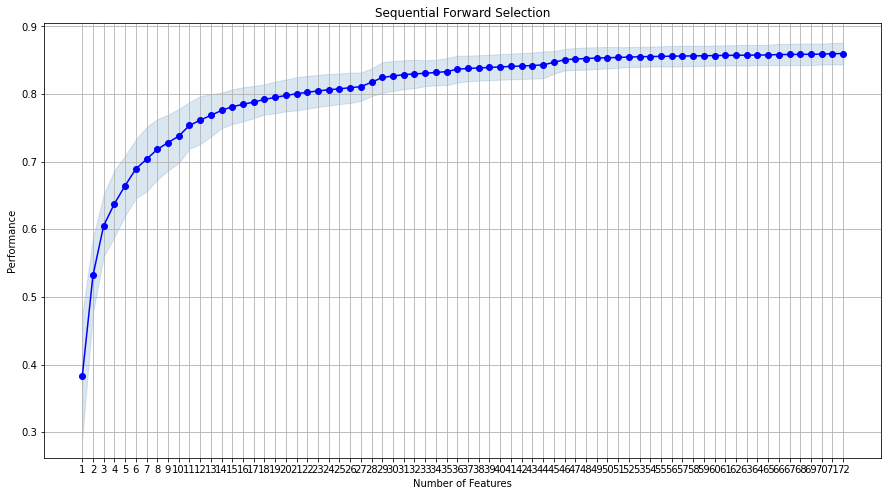

In [1142]:
fig1 = plot_sfs(sfs2.get_metric_dict())
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [1143]:
# Creating Dataframe representing performance of Features in SFS 

sfs2_df = pd.DataFrame(sfs2.get_metric_dict()).T.reset_index()

display(sfs2_df.head(3))

,index,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,1,"(208,)","[0.3681839750808069, 0.24847377704385198, 0.32...",0.382426,"(GarageCars_3+,)",0.117029,0.0910522,0.0455261
1,2,"(133, 208)","[0.5414468333677965, 0.4571868774860238, 0.483...",0.531629,"(ExterQual_TA, GarageCars_3+)",0.070645,0.0549642,0.0274821
2,3,"(133, 195, 208)","[0.6102398421585946, 0.5692343009300644, 0.548...",0.605365,"(ExterQual_TA, FireplaceQu_None, GarageCars_3+)",0.0588484,0.045786,0.022893


In [1144]:
# Best score at 

sfs2_df.iloc[47].to_frame()

,47
index,48
feature_idx,"(5, 32, 33, 39, 40, 41, 43, 49, 50, 51, 55, 56..."
cv_scores,"[0.8488030704037357, 0.8400811079057008, 0.833..."
avg_score,0.852275
feature_names,"(Dwell_Type_30, LotConfig_CulDSac, LotConfig_F..."
ci_bound,0.0209538
std_dev,0.0163028
std_err,0.00815139


In [1145]:
cat_features = list(sfs2_df.iloc[47][4])
len(cat_features)

48

In [1146]:
x = df1[cat_features]
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1147]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

RMSE : 29132.6571937972
MAE : 20776.28789345988


### Num_features + Cat_features

In [1148]:
features = num_features + cat_features

In [1149]:
len(features)

58

In [1150]:
x = df1[features]
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1151]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [1152]:
# print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

RMSE : 23582.832856294834
MAE : 16433.49784178819


- To check if we can use lesser features to predict the same or better

In [1153]:
sfs3 = sfs(LinearRegression(), k_features=58, forward=True, floating=True, cv=5, verbose=1, scoring='r2')

sfs3.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    0.2s finished
Features: 1/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBacken

Features: 27/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished
Features: 28/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished
Features: 29/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished
Features: 30/58[Parallel(n_jobs=1)]: Using backen

[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.4s finished
Features: 52/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.4s finished
Features: 53/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    0.4s finished
Features: 54/58[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elaps

SequentialFeatureSelector(estimator=LinearRegression(), floating=True,
                          k_features=58, scoring='r2', verbose=1)

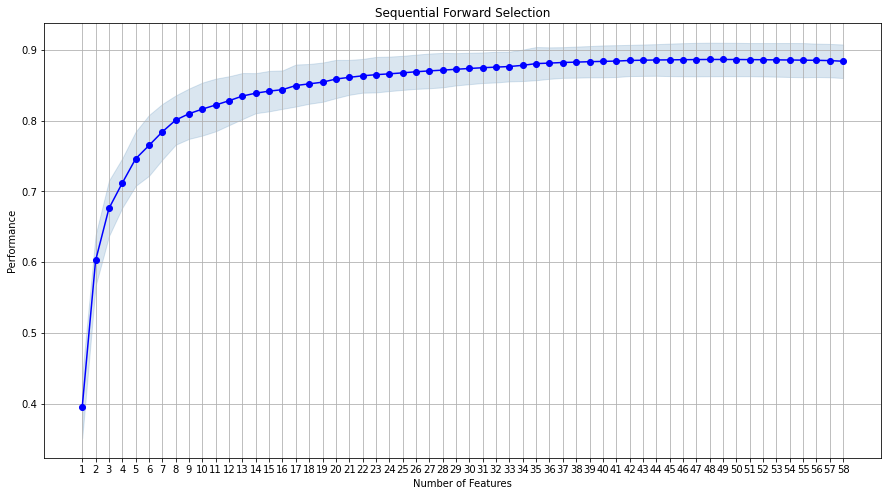

In [1154]:
fig1 = plot_sfs(sfs3.get_metric_dict())
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [1155]:
# Creating Dataframe representing performance of Features in SFS 

sfs3_df = pd.DataFrame(sfs3.get_metric_dict()).T.reset_index()

display(sfs3_df.head(3))

,index,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,1,"(4,)","[0.4031839489873048, 0.3311982895260801, 0.386...",0.396028,"(TotalBsmtSF,)",0.0568122,0.0442018,0.0221009
1,2,"(4, 6)","[0.5969337899303989, 0.5426967436854133, 0.596...",0.602437,"(TotalBsmtSF, 2ndFlrSF)",0.0461365,0.0358957,0.0179479
2,3,"(4, 6, 8)","[0.6602831467281318, 0.636959795285607, 0.6384...",0.675946,"(TotalBsmtSF, 2ndFlrSF, GarageArea)",0.0504201,0.0392286,0.0196143


In [1179]:
# Best score at 

sfs3_df.iloc[43].to_frame()

,43
index,44
feature_idx,"(1, 3, 4, 5, 6, 11, 13, 14, 15, 16, 17, 18, 19..."
cv_scores,"[0.8664295270023019, 0.8865862329976011, 0.856..."
avg_score,0.885453
feature_names,"(YearRemodAdd, BsmtFinSF1, TotalBsmtSF, 1stFlr..."
ci_bound,0.0286941
std_dev,0.022325
std_err,0.0111625


In [1175]:
final_features = list(sfs3_df.iloc[43][4])
len(final_features)

44

In [1176]:
x = df1[final_features]
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1177]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [1178]:
# print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

RMSE : 23435.472035234867
MAE : 16555.56362893123


## RandomForest

In [1161]:
x = df1.drop(columns=['Property_Sale_Price'])
y = df1['Property_Sale_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 112)

In [1162]:
rf = RandomForestRegressor(n_estimators=400)

In [1163]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('RMSE :', metrics.mean_squared_error(y_test, y_pred,squared=False))

RMSE : 24231.797338066197


### Using GridSearchCV to get best Hyper-Parameters

In [1164]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 16, num = 8)]

# Maximum Features
max_features = [int(x) for x in np.linspace(2, 16, num = 8)]

params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}

print(params)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [4, 5, 7, 9, 10, 12, 14, 16], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16]}


In [1165]:
rf_grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=4, verbose=2)

rf_grid.fit(x_train, y_train)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=2, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=2, n_estimators=300 ...................
[CV] .

[CV] .... max_depth=4, max_features=6, n_estimators=500, total=   0.4s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=100 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=8, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=8, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=8, n_estimators=200 ...................
[CV] .

[CV] ... max_depth=4, max_features=12, n_estimators=500, total=   0.5s
[CV] max_depth=4, max_features=12, n_estimators=500 ..................
[CV] ... max_depth=4, max_features=12, n_estimators=500, total=   0.5s
[CV] max_depth=4, max_features=12, n_estimators=500 ..................
[CV] ... max_depth=4, max_features=12, n_estimators=500, total=   0.5s
[CV] max_depth=4, max_features=14, n_estimators=100 ..................
[CV] ... max_depth=4, max_features=14, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=14, n_estimators=100 ..................
[CV] ... max_depth=4, max_features=14, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=14, n_estimators=100 ..................
[CV] ... max_depth=4, max_features=14, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=14, n_estimators=100 ..................
[CV] ... max_depth=4, max_features=14, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=14, n_estimators=200 ..................
[CV] .

[CV] .... max_depth=5, max_features=2, n_estimators=400, total=   0.3s
[CV] max_depth=5, max_features=2, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=2, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=2, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=2, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=4, n_estimators=100 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=100 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=100 ...................
[CV] .

[CV] .... max_depth=5, max_features=8, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=8, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=8, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=8, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=8, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=8, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=8, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=8, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=8, n_estimators=500 ...................
[CV] .... max_depth=5, max_features=8, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=10, n_estimators=100 ..................
[CV] .

[CV] ... max_depth=5, max_features=14, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=14, n_estimators=400 ..................
[CV] ... max_depth=5, max_features=14, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=14, n_estimators=400 ..................
[CV] ... max_depth=5, max_features=14, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=14, n_estimators=400 ..................
[CV] ... max_depth=5, max_features=14, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=14, n_estimators=400 ..................
[CV] ... max_depth=5, max_features=14, n_estimators=400, total=   0.4s
[CV] max_depth=5, max_features=14, n_estimators=500 ..................
[CV] ... max_depth=5, max_features=14, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=14, n_estimators=500 ..................
[CV] ... max_depth=5, max_features=14, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=14, n_estimators=500 ..................
[CV] .

[CV] .... max_depth=7, max_features=4, n_estimators=300, total=   0.3s
[CV] max_depth=7, max_features=4, n_estimators=300 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=300, total=   0.3s
[CV] max_depth=7, max_features=4, n_estimators=300 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=300, total=   0.3s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   0.4s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   0.4s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   0.4s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   0.4s
[CV] max_depth=7, max_features=4, n_estimators=500 ...................
[CV] .

[CV] ... max_depth=7, max_features=10, n_estimators=200, total=   0.2s
[CV] max_depth=7, max_features=10, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=10, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=10, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=10, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=10, n_estimators=400 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=400, total=   0.5s
[CV] max_depth=7, max_features=10, n_estimators=400 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=400, total=   0.5s
[CV] max_depth=7, max_features=10, n_estimators=400 ..................
[CV] .

[CV] ... max_depth=7, max_features=16, n_estimators=200, total=   0.3s
[CV] max_depth=7, max_features=16, n_estimators=200 ..................
[CV] ... max_depth=7, max_features=16, n_estimators=200, total=   0.3s
[CV] max_depth=7, max_features=16, n_estimators=200 ..................
[CV] ... max_depth=7, max_features=16, n_estimators=200, total=   0.3s
[CV] max_depth=7, max_features=16, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=16, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=16, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=16, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=16, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=16, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=16, n_estimators=300 ..................
[CV] ... max_depth=7, max_features=16, n_estimators=300, total=   0.4s
[CV] max_depth=7, max_features=16, n_estimators=400 ..................
[CV] .

[CV] .... max_depth=9, max_features=6, n_estimators=100, total=   0.1s
[CV] max_depth=9, max_features=6, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=6, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=6, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=6, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=6, n_estimators=300 ...................
[CV] .... max_depth=9, max_features=6, n_estimators=300, total=   0.4s
[CV] max_depth=9, max_features=6, n_estimators=300 ...................
[CV] .... max_depth=9, max_features=6, n_estimators=300, total=   0.4s
[CV] max_depth=9, max_features=6, n_estimators=300 ...................
[CV] .

[CV] ... max_depth=9, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=9, max_features=12, n_estimators=100 ..................
[CV] ... max_depth=9, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=9, max_features=12, n_estimators=100 ..................
[CV] ... max_depth=9, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=9, max_features=12, n_estimators=200 ..................
[CV] ... max_depth=9, max_features=12, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=12, n_estimators=200 ..................
[CV] ... max_depth=9, max_features=12, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=12, n_estimators=200 ..................
[CV] ... max_depth=9, max_features=12, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=12, n_estimators=200 ..................
[CV] ... max_depth=9, max_features=12, n_estimators=200, total=   0.3s
[CV] max_depth=9, max_features=12, n_estimators=300 ..................
[CV] .

[CV] ... max_depth=9, max_features=16, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=2, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=2, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=2, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=2, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] .

[CV] ... max_depth=10, max_features=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=6, n_estimators=500 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=6, n_estimators=500 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=8, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=8, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=8, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=8, n_estimators=100 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=8, n_estimators=200 ..................
[CV] .

[CV] .. max_depth=10, max_features=12, n_estimators=400, total=   0.6s
[CV] max_depth=10, max_features=12, n_estimators=500 .................
[CV] .. max_depth=10, max_features=12, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=12, n_estimators=500 .................
[CV] .. max_depth=10, max_features=12, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=12, n_estimators=500 .................
[CV] .. max_depth=10, max_features=12, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=12, n_estimators=500 .................
[CV] .. max_depth=10, max_features=12, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=14, n_estimators=100 .................
[CV] .. max_depth=10, max_features=14, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=14, n_estimators=100 .................
[CV] .. max_depth=10, max_features=14, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=14, n_estimators=100 .................
[CV] .

[CV] ... max_depth=12, max_features=2, n_estimators=400, total=   0.4s
[CV] max_depth=12, max_features=2, n_estimators=400 ..................
[CV] ... max_depth=12, max_features=2, n_estimators=400, total=   0.8s
[CV] max_depth=12, max_features=2, n_estimators=400 ..................
[CV] ... max_depth=12, max_features=2, n_estimators=400, total=   0.4s
[CV] max_depth=12, max_features=2, n_estimators=500 ..................
[CV] ... max_depth=12, max_features=2, n_estimators=500, total=   0.5s
[CV] max_depth=12, max_features=2, n_estimators=500 ..................
[CV] ... max_depth=12, max_features=2, n_estimators=500, total=   0.5s
[CV] max_depth=12, max_features=2, n_estimators=500 ..................
[CV] ... max_depth=12, max_features=2, n_estimators=500, total=   0.5s
[CV] max_depth=12, max_features=2, n_estimators=500 ..................
[CV] ... max_depth=12, max_features=2, n_estimators=500, total=   0.5s
[CV] max_depth=12, max_features=4, n_estimators=100 ..................
[CV] .

[CV] ... max_depth=12, max_features=8, n_estimators=300, total=   0.4s
[CV] max_depth=12, max_features=8, n_estimators=400 ..................
[CV] ... max_depth=12, max_features=8, n_estimators=400, total=   0.6s
[CV] max_depth=12, max_features=8, n_estimators=400 ..................
[CV] ... max_depth=12, max_features=8, n_estimators=400, total=   0.6s
[CV] max_depth=12, max_features=8, n_estimators=400 ..................
[CV] ... max_depth=12, max_features=8, n_estimators=400, total=   0.6s
[CV] max_depth=12, max_features=8, n_estimators=400 ..................
[CV] ... max_depth=12, max_features=8, n_estimators=400, total=   0.6s
[CV] max_depth=12, max_features=8, n_estimators=500 ..................
[CV] ... max_depth=12, max_features=8, n_estimators=500, total=   0.7s
[CV] max_depth=12, max_features=8, n_estimators=500 ..................
[CV] ... max_depth=12, max_features=8, n_estimators=500, total=   0.7s
[CV] max_depth=12, max_features=8, n_estimators=500 ..................
[CV] .

[CV] .. max_depth=12, max_features=14, n_estimators=300, total=   0.5s
[CV] max_depth=12, max_features=14, n_estimators=300 .................
[CV] .. max_depth=12, max_features=14, n_estimators=300, total=   0.6s
[CV] max_depth=12, max_features=14, n_estimators=300 .................
[CV] .. max_depth=12, max_features=14, n_estimators=300, total=   0.6s
[CV] max_depth=12, max_features=14, n_estimators=400 .................
[CV] .. max_depth=12, max_features=14, n_estimators=400, total=   0.7s
[CV] max_depth=12, max_features=14, n_estimators=400 .................
[CV] .. max_depth=12, max_features=14, n_estimators=400, total=   0.7s
[CV] max_depth=12, max_features=14, n_estimators=400 .................
[CV] .. max_depth=12, max_features=14, n_estimators=400, total=   0.7s
[CV] max_depth=12, max_features=14, n_estimators=400 .................
[CV] .. max_depth=12, max_features=14, n_estimators=400, total=   0.7s
[CV] max_depth=12, max_features=14, n_estimators=500 .................
[CV] .

[CV] ... max_depth=14, max_features=4, n_estimators=200, total=   0.3s
[CV] max_depth=14, max_features=4, n_estimators=300 ..................
[CV] ... max_depth=14, max_features=4, n_estimators=300, total=   0.4s
[CV] max_depth=14, max_features=4, n_estimators=300 ..................
[CV] ... max_depth=14, max_features=4, n_estimators=300, total=   0.4s
[CV] max_depth=14, max_features=4, n_estimators=300 ..................
[CV] ... max_depth=14, max_features=4, n_estimators=300, total=   0.4s
[CV] max_depth=14, max_features=4, n_estimators=300 ..................
[CV] ... max_depth=14, max_features=4, n_estimators=300, total=   0.4s
[CV] max_depth=14, max_features=4, n_estimators=400 ..................
[CV] ... max_depth=14, max_features=4, n_estimators=400, total=   0.5s
[CV] max_depth=14, max_features=4, n_estimators=400 ..................
[CV] ... max_depth=14, max_features=4, n_estimators=400, total=   0.5s
[CV] max_depth=14, max_features=4, n_estimators=400 ..................
[CV] .

[CV] .. max_depth=14, max_features=10, n_estimators=200, total=   0.3s
[CV] max_depth=14, max_features=10, n_estimators=200 .................
[CV] .. max_depth=14, max_features=10, n_estimators=200, total=   0.3s
[CV] max_depth=14, max_features=10, n_estimators=200 .................
[CV] .. max_depth=14, max_features=10, n_estimators=200, total=   0.3s
[CV] max_depth=14, max_features=10, n_estimators=300 .................
[CV] .. max_depth=14, max_features=10, n_estimators=300, total=   0.5s
[CV] max_depth=14, max_features=10, n_estimators=300 .................
[CV] .. max_depth=14, max_features=10, n_estimators=300, total=   0.5s
[CV] max_depth=14, max_features=10, n_estimators=300 .................
[CV] .. max_depth=14, max_features=10, n_estimators=300, total=   0.5s
[CV] max_depth=14, max_features=10, n_estimators=300 .................
[CV] .. max_depth=14, max_features=10, n_estimators=300, total=   0.5s
[CV] max_depth=14, max_features=10, n_estimators=400 .................
[CV] .

[CV] .. max_depth=14, max_features=16, n_estimators=100, total=   0.2s
[CV] max_depth=14, max_features=16, n_estimators=200 .................
[CV] .. max_depth=14, max_features=16, n_estimators=200, total=   0.4s
[CV] max_depth=14, max_features=16, n_estimators=200 .................
[CV] .. max_depth=14, max_features=16, n_estimators=200, total=   0.4s
[CV] max_depth=14, max_features=16, n_estimators=200 .................
[CV] .. max_depth=14, max_features=16, n_estimators=200, total=   0.4s
[CV] max_depth=14, max_features=16, n_estimators=200 .................
[CV] .. max_depth=14, max_features=16, n_estimators=200, total=   0.4s
[CV] max_depth=14, max_features=16, n_estimators=300 .................
[CV] .. max_depth=14, max_features=16, n_estimators=300, total=   0.6s
[CV] max_depth=14, max_features=16, n_estimators=300 .................
[CV] .. max_depth=14, max_features=16, n_estimators=300, total=   0.6s
[CV] max_depth=14, max_features=16, n_estimators=300 .................
[CV] .

[CV] ... max_depth=16, max_features=6, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=6, n_estimators=100 ..................
[CV] ... max_depth=16, max_features=6, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=6, n_estimators=100 ..................
[CV] ... max_depth=16, max_features=6, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=6, n_estimators=200 ..................
[CV] ... max_depth=16, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=16, max_features=6, n_estimators=200 ..................
[CV] ... max_depth=16, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=16, max_features=6, n_estimators=200 ..................
[CV] ... max_depth=16, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=16, max_features=6, n_estimators=200 ..................
[CV] ... max_depth=16, max_features=6, n_estimators=200, total=   0.3s
[CV] max_depth=16, max_features=6, n_estimators=300 ..................
[CV] .

[CV] .. max_depth=16, max_features=10, n_estimators=500, total=   0.9s
[CV] max_depth=16, max_features=12, n_estimators=100 .................
[CV] .. max_depth=16, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=12, n_estimators=100 .................
[CV] .. max_depth=16, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=12, n_estimators=100 .................
[CV] .. max_depth=16, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=12, n_estimators=100 .................
[CV] .. max_depth=16, max_features=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, max_features=12, n_estimators=200 .................
[CV] .. max_depth=16, max_features=12, n_estimators=200, total=   0.4s
[CV] max_depth=16, max_features=12, n_estimators=200 .................
[CV] .. max_depth=16, max_features=12, n_estimators=200, total=   0.4s
[CV] max_depth=16, max_features=12, n_estimators=200 .................
[CV] .

[CV] .. max_depth=16, max_features=16, n_estimators=500, total=   1.1s
[CV] max_depth=16, max_features=16, n_estimators=500 .................
[CV] .. max_depth=16, max_features=16, n_estimators=500, total=   1.1s
[CV] max_depth=16, max_features=16, n_estimators=500 .................
[CV] .. max_depth=16, max_features=16, n_estimators=500, total=   1.1s


[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:  8.7min finished


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 7, 9, 10, 12, 14, 16],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [1166]:
rf_grid.best_params_

{'max_depth': 16, 'max_features': 16, 'n_estimators': 300}

In [1167]:
rf = RandomForestRegressor(max_depth= 16, max_features= 16, n_estimators= 400)

In [1168]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('RMSE :', metrics.mean_squared_error(y_test, y_pred,squared=False))

RMSE : 22235.723772974176
